In [1]:
from numpy import linalg
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn import model_selection
from sklearn import datasets
from sklearn.base import BaseEstimator, ClassifierMixin
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [2]:
#loading data
digits = skl.datasets.load_digits()

In [3]:
#implementing kNN classifier
class knn(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, metric=lambda a, b: np.linalg.norm(a-b)):
        self.k = k
        self.metric = metric
        pass
    
    def fit(self, X, y):
        #data is expected to be numpy array or similar
        self._data_ = X.copy()
        self._targets_ = y.copy()
        self._weights_ = [0]*len(X)
        flag = True
        counter = 0
        while flag:
            i = random.randint(0, len(X)-1)
            y_ = self.predict_one(self._data_[i])
            self._weights_[i] += 1 if y_ != self._targets_[i] else 0
            
            counter += 1
            if counter == 700:
                counter = 0
                y_ = self.predict(X)
                buff = 0
                for y1, y2 in zip(y, y_):
                    buff += 0 if y1 == y2 else 1
                buff /= len(y)
                flag = (buff > 0.005)
                print(buff)
        return self
    
    def predict(self, sample):
        return [self.predict_one(s) for s in sample]
    def predict_one(self, sample):
        buff = [(self.metric(sample, neighbour), target, weight) 
                for neighbour, target, weight in zip(self._data_, self._targets_, self._weights_)]
        buff.sort(key = lambda element: element[0])
        labels = [0]*10
        for dist, label, weight in buff[:self.k]:
            labels[label] += weight*(1/(1+dist))
        return np.argmax(labels)
    def score(self, X, y):
        y_ = predict(X)
        buff = 0
        for y1, y2 in zip(y, y_):
            buff += 0 if y1 == y2 else 1
        buff /= len(y)
        return buff

In [4]:
#6. splitting data on test and train
def split(test_size):
    train_data, test_data, train_targets, test_targets = skl.model_selection.train_test_split(digits.data, digits.target, test_size=test_size)
    return train_data, test_data, train_targets, test_targets

In [5]:
#7. fitting the classifier on data
def fit(classifier_class, k, train_data, train_targets):
    cl = classifier_class(k, metric=lambda a, b: np.linalg.norm(a-b))
    cl.fit(train_data, train_targets)
    return cl

In [6]:
#8. testing the classifier using confusion matrix
def test(classifier, test_data, test_targets):
    conf_matr = np.zeros((10, 10)) #predicted, actual
    for sample, target in zip(test_data, test_targets):
        prediction = classifier.predict([sample])
        conf_matr[prediction, target] += 1

    print(conf_matr)

    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = ax.imshow(conf_matr, cmap=plt.cm.jet, 
                    interpolation='nearest')

In [7]:
#utility function
def combine(test_size, k, classifier_class):
    train_data, test_data, train_targets, test_targets = split(test_size)
    cl = fit(classifier_class, k, train_data, train_targets)
    test(cl, test_data, test_targets)

0.29684601113172543
0.13172541743970315
0.0655534941249227
0.03525046382189239
0.016697588126159554
0.008039579468150896
0.004947433518862091
[[20.  1.  1.  1.  3.  2.  1.  1.  4.  1.]
 [ 0. 24.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 15.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 11.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 14.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 15.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 20.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 15.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 13.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 17.]]


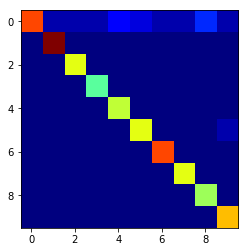

In [12]:
#9. investigating different parameters
combine(0.1, 3, knn)

[[16.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 17.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 19.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 23.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 18.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 16.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 12.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 14.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 19.]]


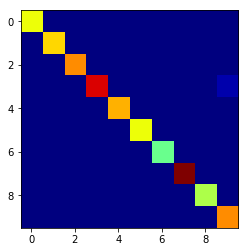

In [9]:
#10. checking out sklearn kNN
combine(0.1, 3, skl.neighbors.KNeighborsClassifier)